<a href="https://colab.research.google.com/github/sahilsharma1699/CodeWithCoffee/blob/master/DSPrjoect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
 
#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
 
#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime
 
#To handle floats in Python 2
from __future__ import division

In [ ]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','YHOO']

In [ ]:
#Setting the end date to today
end = datetime.now()
 
#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

In [ ]:
#Using Yahoo Finance to grab the stock data
#error
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable

KeyError: ignored

In [ ]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-20,66.519997,65.099998,66.385002,65.797501,106234400.0,64.704376
2019-11-21,66.002502,65.294998,65.922501,65.502502,121395200.0,64.414268
2019-11-22,65.794998,65.209999,65.647499,65.445000,65325200.0,64.357727
2019-11-25,66.610001,65.629997,65.677498,66.592499,84020400.0,65.486168
2019-11-26,66.790001,65.625000,66.735001,66.072502,105207600.0,64.974815


In [ ]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,90.289328,87.745326,88.995287,89.088270,1.515710e+08,88.456497
std,20.797943,20.068096,20.622906,20.401946,7.496661e+07,20.753233
min,57.125000,53.152500,57.020000,56.092499,2.543240e+07,55.291519
25%,72.495003,70.730003,71.205002,72.019997,1.044912e+08,70.991577
50%,81.162498,79.737503,80.657501,80.834999,1.354452e+08,79.749702
75%,113.275002,109.797501,111.970001,111.809998,1.846420e+08,111.617432
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [ ]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-11-20 to 2020-11-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


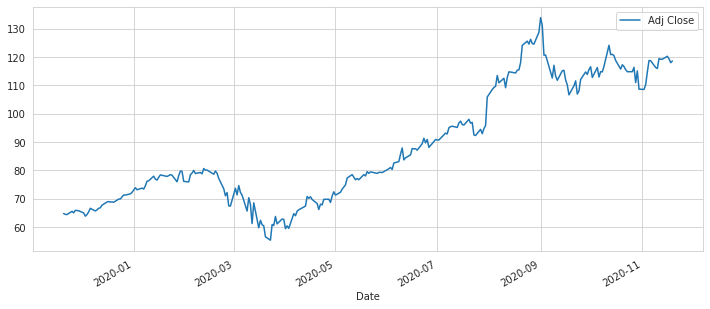

In [ ]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

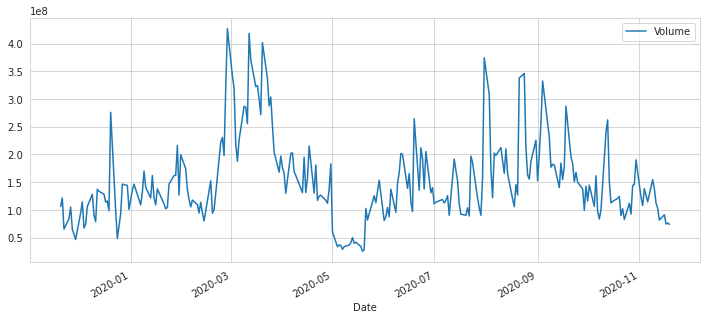

In [ ]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

In [ ]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [ ]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-11-13,119.669998,117.870003,119.440002,119.260002,81581900.0,119.260002,116.134948,115.377600,114.914007
2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,120.300003,117.306682,115.603587,114.904974
2020-11-17,120.669998,118.959999,119.550003,119.389999,74271000.0,119.389999,118.220702,115.707706,115.040260
2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,118.029999,118.548500,115.775770,115.058501
2020-11-19,119.059998,116.809998,117.589996,118.639999,73860200.0,118.639999,118.530000,115.930238,115.165410


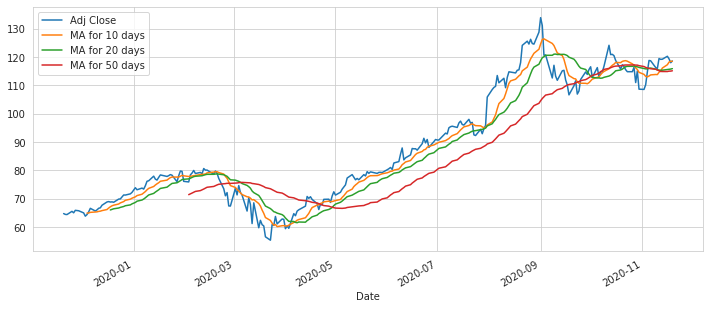

In [ ]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

In [ ]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [ ]:

AAPL['Daily Return'].tail()

Date
2020-11-13    0.000419
2020-11-16    0.008720
2020-11-17   -0.007564
2020-11-18   -0.011391
2020-11-19    0.005168
Name: Daily Return, dtype: float64

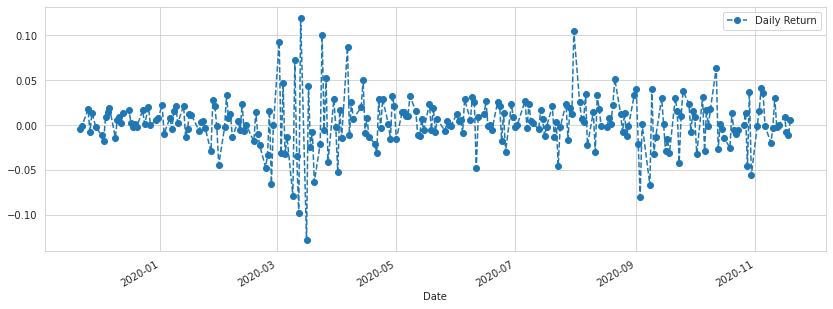

In [ ]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


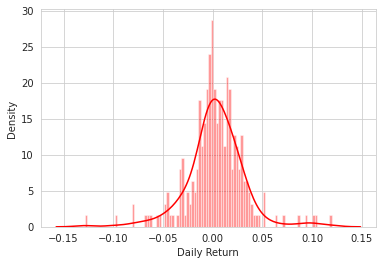

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

In [ ]:
#Reading just the 'Adj Close' column this time
close_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'YHOO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [ ]:
close_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,YHOO
Date,,,,,
2020-11-13,119.260002,1777.020020,215.944641,3128.810059,NaN
2020-11-16,120.300003,1781.380005,216.662766,3131.060059,NaN
2020-11-17,119.389999,1770.150024,213.900009,3135.659912,NaN
2020-11-18,118.029999,1746.780029,211.080002,3105.459961,NaN
2020-11-19,118.639999,1763.920044,212.419998,3117.020020,NaN


In [ ]:
rets_df = close_df.pct_change()

In [ ]:
rets_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,YHOO
Date,,,,,
2020-11-13,0.000419,0.015533,0.004967,0.005958,NaN
2020-11-16,0.008720,0.002454,0.003326,0.000719,NaN
2020-11-17,-0.007564,-0.006304,-0.012751,0.001469,NaN
2020-11-18,-0.011391,-0.013202,-0.013184,-0.009631,NaN
2020-11-19,0.005168,0.009812,0.006348,0.003722,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


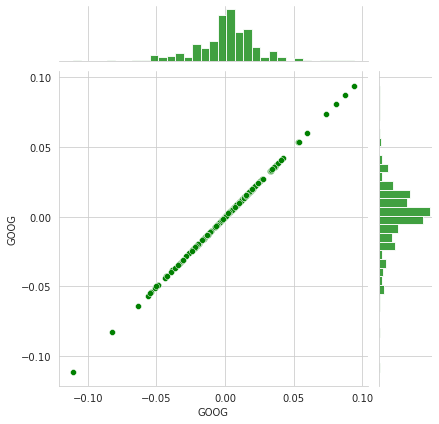

In [ ]:
sns.jointplot('GOOG','GOOG',rets_df,kind='scatter',color='green')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


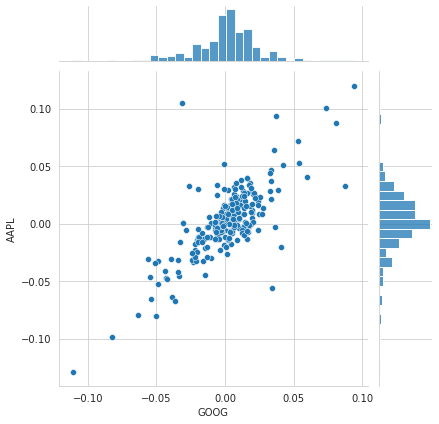

In [ ]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')

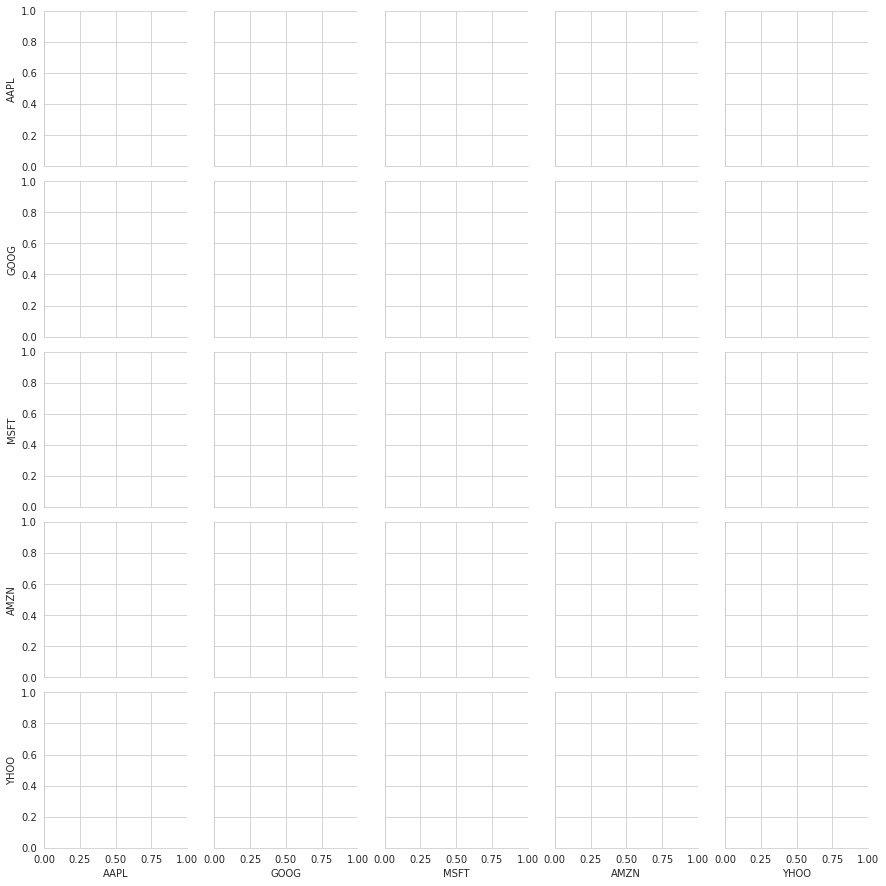

In [ ]:
sns.pairplot(rets_df.dropna())

In [ ]:
#error
sns.corrplot(rets_df.dropna(),annot=True)

AttributeError: ignored

In [ ]:
rets = rets_df.dropna()

In [ ]:
#error
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

StopIteration: ignored

<Figure size 576x360 with 1 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


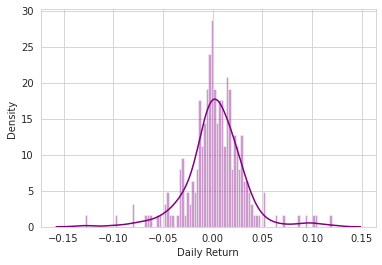

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,YHOO
Date,,,,,


In [ ]:
rets['AAPL'].quantile(0.05)

nan

In [ ]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [ ]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [ ]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-20,1315.000000,1291.150024,1311.739990,1303.050049,1308600,1303.050049
2019-11-21,1312.589966,1293.000000,1301.479980,1301.349976,995500,1301.349976
2019-11-22,1308.729980,1291.410034,1305.619995,1295.339966,1385700,1295.339966
2019-11-25,1311.310059,1298.130005,1299.180054,1306.689941,1036200,1306.689941
2019-11-26,1314.800049,1305.089966,1309.859985,1313.550049,1069700,1313.550049


In [ ]:
#error
start_price = 622.049 #Taken from above

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

NameError: ignored

In [ ]:
#error
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

NameError: ignored

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

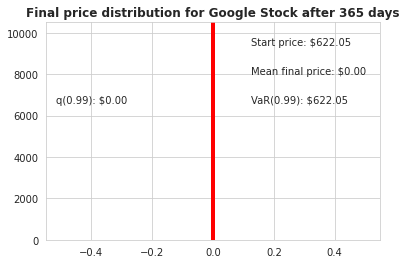

In [ ]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')